<h1><center> MCD - Ciencia de Datos Responsable </center></h1>
<h2><center> Tutorial 1: Introducción COMPAS </center></h2>



In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2> COMPAS: Correctional Offender Management Profiling for Alternative Sanctions </h2>

![imagen](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-960*540-00796e.jpg)
<b><h6> Imagen 1 - Machine Bias (ProPublica) </h6></b>

- Algoritmo utilizado en el sistema de justicia criminal de Estados Unidos para predecir la probabilidad o riesgo de reincidencia de un acusado.

- Tiene por objetivo  ayudar a los jueces a tomar decisiones más informadas sobre el riesgo de reincidencia.

Investigación hecha por ProPublica: Existe una clara diferencia en la distribución de los puntajes de riesgo según raza.

<b><h3>Links de interés: </h3></b>

- [Articulo ProPublica : Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

- [Metodología](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)

- [Códigos originales de ProPublica](https://github.com/propublica/compas-analysis/tree/master)




In [2]:
compas = pd.read_csv('https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv')
compas.shape

(7214, 53)

In [3]:
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## Columnas de interés:

1. `age` - Edad del acusado. Variable numérica.
2. `age_cat` - Categoría de edad. Puede ser < 25, 25-45, >45.
3. `sex` - Sexo del acusado. Puede ser  'Male' o 'Female'.
4. `race` - Raza del acusado. Puede ser 'African-American', 'Caucasian', 'Hispanic', 'Asian', o 'Other'.
5. `c_charge_degree` - Grado del crimen. Es o bien M (Misdemeanor), F (Felony), o O (Ordinary traffic offense).
6. `priors_count` - Número de crimenes anteriores cometidos por el acusado. Variable numérica.
7. `days_b_screening_arrest` - Días entre el arresto y la fecha del cargo por el delito registrado en COMPAS.
8. `decile_score` - Puntaje COMPAS predicho por el sistema. Toma valores entre 0 y 10.
9. `score_text` - Categoria de decile_score. Puede Low (1-4), Medium (5-7), y High (8-10).
10. `is_recid` - Variable que indica si un acusado es reincidente o no. Puede tomar valores 1, 0 o -1.
11. `two_year_recid` - Variable que indica si un acusado tuvo reincidencia dentro de un periodo de dos años.
12. `c_jail_in` - Momento en que el acusado fue ingresado a la carcel.
13. `c_jail_out` - Momento en que el acusado fue liberado de la carcel.

In [4]:
# Mantenemos las columnas de interés.

columns = ['age', 'c_charge_degree', 'race', 'age_cat',
           'score_text', 'sex', 'priors_count', 'days_b_screening_arrest',
           'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']

compas = compas[columns]


In [5]:
compas.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
3,23,F,African-American,Less than 25,High,Male,1,NaN,8,0,0,NaN,NaN
4,43,F,Other,25 - 45,Low,Male,2,NaN,1,0,0,NaN,NaN


In [6]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7214 non-null   int64  
 1   c_charge_degree          7214 non-null   object 
 2   race                     7214 non-null   object 
 3   age_cat                  7214 non-null   object 
 4   score_text               7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   priors_count             7214 non-null   int64  
 7   days_b_screening_arrest  6907 non-null   float64
 8   decile_score             7214 non-null   int64  
 9   is_recid                 7214 non-null   int64  
 10  two_year_recid           7214 non-null   int64  
 11  c_jail_in                6907 non-null   object 
 12  c_jail_out               6907 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 732.8+ KB


En la metodología propuesta por ProPublica (revisar <b>Links de interés</b>) se presentan los siguientes criterios para realizar la limpieza de los datos:

- Si la fecha del cargo por el delito de un acusado evaluado por COMPAS no estaba dentro de los 30 días desde el momento en que la persona fue arrestada, asumimos que, debido a razones de calidad de datos, no tenemos el delito correcto.

- Según se indica en el código publicado por ProPublica, se etiquetó con ```is_recid = -1``` los casos para los cuales no se encontró el caso de COMPAS.

- En una línea similar, se eliminan las infracciones de tráfico comunes (aquellas con un grado de ```c_charge_degree``` <b>'O'</b>), que no resultarían en tiempo de prisión.


In [7]:
clean_df = compas[((compas['days_b_screening_arrest'] <= 30) &\
                  (compas['days_b_screening_arrest'] >= -30) &\
                  (compas['is_recid'] != -1) &\
                  (compas['c_charge_degree'] != 'O'))]
clean_df.shape

(6172, 13)

In [8]:
compas.shape

(7214, 13)

In [9]:
print(f'Se eliminaron {compas.shape[0] - clean_df.shape[0]} regitros.')

Se eliminaron 1042 regitros.


In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 675.1+ KB


In [11]:
age_count = clean_df['age_cat'].value_counts(normalize=True) * 100
race_count = clean_df['race'].value_counts(normalize=True) * 100
sex_count = clean_df['sex'].value_counts(normalize=True) * 100

## Análisis exploratorio

### Distribución de la edad

AttributeError: module 'seaborn' has no attribute 'histplot'

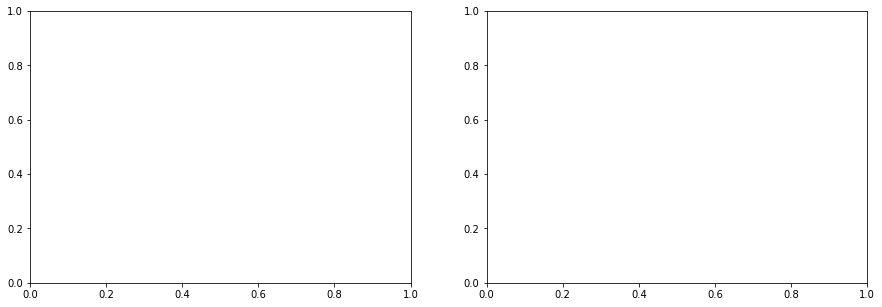

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

sns.histplot(data=clean_df, x='age', color='darkblue', ax=ax[0])
sns.countplot(data=clean_df, x='age_cat', ax=ax[1])

ax[0].set_title('Distribución de la edad')
ax[1].set_title('Nº registros por categoría de edad')
plt.show()


In [13]:
age_count

25 - 45            57.226183
Less than 25       21.824368
Greater than 45    20.949449
Name: age_cat, dtype: float64

#### Interseccionalidad (edad)

In [14]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['race'], index=clean_df['age_cat'], aggfunc=lambda x: len(x),normalize='all') * 100

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
age_cat,,,,,,
25 - 45,30.751782,0.226831,18.276086,4.714841,0.113415,3.143227
Greater than 45,7.582631,0.178224,10.174984,1.766040,0.032404,1.215165
Less than 25,13.107583,0.097213,5.622165,1.766040,0.032404,1.198963


### Distribución de la raza

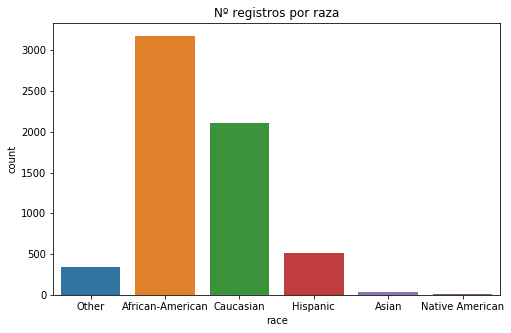

In [15]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sns.countplot(x=clean_df['race'])
plt.title('Nº registros por raza')
plt.show()

In [16]:
race_count

African-American    51.441996
Caucasian           34.073234
Hispanic             8.246922
Other                5.557356
Asian                0.502268
Native American      0.178224
Name: race, dtype: float64

### Interseccionalidad (raza)


In [17]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['age_cat'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

age_cat,25 - 45,Greater than 45,Less than 25
race,,,
African-American,59.779528,14.740157,25.480315
Asian,45.161290,35.483871,19.354839
Caucasian,53.637660,29.862102,16.500238
Hispanic,57.170923,21.414538,21.414538
Native American,63.636364,18.181818,18.181818
Other,56.559767,21.865889,21.574344


### Distribución del sexo

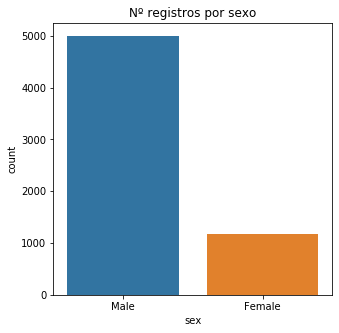

In [18]:
fig, ax = plt.subplots(1, figsize=(5, 5))
sns.countplot(x=clean_df['sex'])
plt.title('Nº registros por sexo')
plt.show()

In [19]:
sex_count

Male      80.962411
Female    19.037589
Name: sex, dtype: float64

### Interseccionalidad (sexo)

In [20]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['sex'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='all') * 100

sex,Female,Male
race,,
African-American,8.895010,42.546986
Asian,0.032404,0.469864
Caucasian,7.809462,26.263772
Hispanic,1.328581,6.918341
Native American,0.032404,0.145820
Other,0.939728,4.617628


Observemos la reincidencia y distribución de los puntajes de riesgo según raza, sexo y edad.

In [21]:
# Datos por sexo
male_data = clean_df[clean_df['sex'] == 'Male']
female_data = clean_df[clean_df['sex'] == 'Female']

# Datos por raza
am_data = clean_df[clean_df['race'] == 'African-American']
cau_data = clean_df[clean_df['race'] == 'Caucasian']

# Datos por categoria de edad
less25_data = clean_df[clean_df['age_cat'] == 'Less than 25']
greater45_data = clean_df[clean_df['age_cat'] == 'Greater than 45']
from25to45_data = clean_df[clean_df['age_cat'] == '25 - 45']



¿Existen diferencias en la reincidencia registrada por sexo?

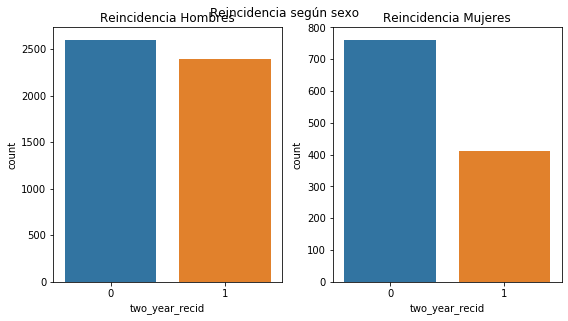

In [22]:
#@title Reincidencia según sexo.
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(data=male_data, x='two_year_recid', ax=ax[0])
sns.countplot(data=female_data, x='two_year_recid', ax=ax[1])


ax[0].set_title('Reincidencia Hombres')
ax[1].set_title('Reincidencia Mujeres')


plt.suptitle('Reincidencia según sexo')

fig.tight_layout()


plt.show()


In [23]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['sex'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
sex,,
Female,64.851064,35.148936
Male,52.051231,47.948769


¿Existen diferencias en la reincidencia registrada por raza?

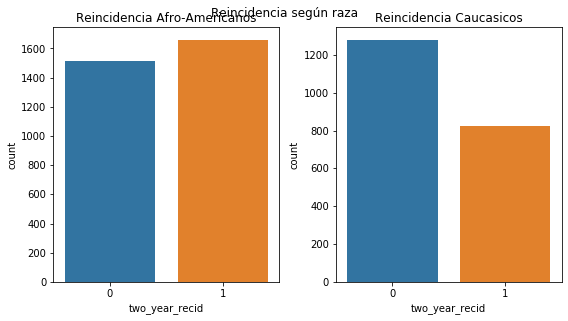

In [24]:
#@title Reincidencia según raza.

fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=am_data['two_year_recid'], ax=ax[0])
sns.countplot(x=cau_data['two_year_recid'], ax=ax[1])


ax[0].set_title('Reincidencia Afro-Americanos')
ax[1].set_title('Reincidencia Caucasicos')


plt.suptitle('Reincidencia según raza')

fig.tight_layout()


plt.show()

In [25]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
race,,
African-American,47.685039,52.314961
Asian,74.193548,25.806452
Caucasian,60.912981,39.087019
Hispanic,62.868369,37.131631
Native American,54.545455,45.454545
Other,63.848397,36.151603


¿Existen diferencias en la reincidencia registrada por categoría de edad?

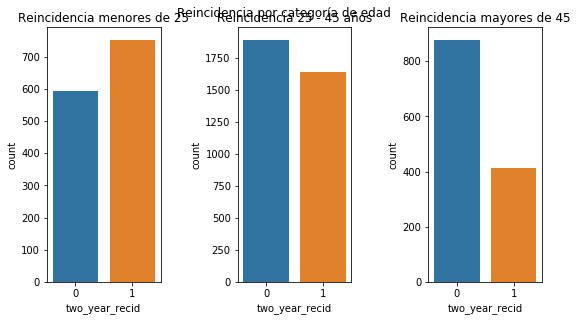

In [26]:
#@title Reincidencia según categoría de edad

fig, ax = plt.subplots(1, 3, figsize=(8, 4.5))
ax = ax.flatten()

sns.countplot(x=less25_data['two_year_recid'], ax=ax[0])
sns.countplot(x=from25to45_data['two_year_recid'], ax=ax[1])
sns.countplot(x=greater45_data['two_year_recid'], ax=ax[2])



ax[0].set_title('Reincidencia menores de 25')
ax[1].set_title('Reincidencia 25 - 45 años')
ax[2].set_title('Reincidencia mayores de 45')


plt.suptitle('Reincidencia por categoría de edad')

fig.tight_layout()


plt.show()

In [27]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['two_year_recid'], index=clean_df['age_cat'], aggfunc=lambda x: len(x), normalize='index') * 100

two_year_recid,0,1
age_cat,,
25 - 45,53.539071,46.460929
Greater than 45,67.981439,32.018561
Less than 25,44.023756,55.976244


¿Existen diferencias en la distribución de los puntajes de riesgo por sexo?

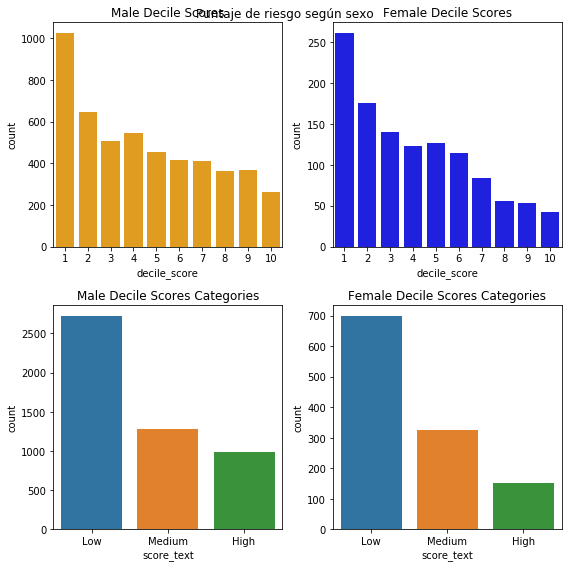

In [28]:
#@title Riesgo según sexo.
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()

sns.countplot(x=male_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=female_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=male_data['score_text'], ax=ax[2])
sns.countplot(x=female_data['score_text'], ax=ax[3])

ax[0].set_title('Male Decile Scores')
ax[1].set_title('Female Decile Scores')
ax[2].set_title('Male Decile Scores Categories')
ax[3].set_title('Female Decile Scores Categories')

plt.suptitle('Puntaje de riesgo según sexo')

fig.tight_layout()


plt.show()


¿Existen diferencias en la distribución de los puntajes de riesgo por raza?

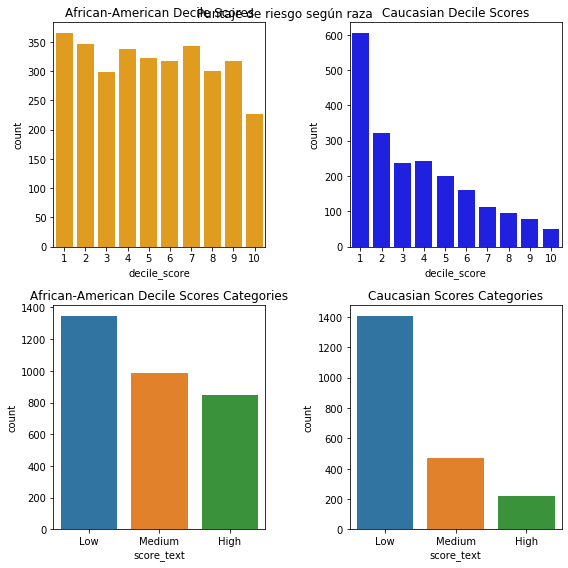

In [29]:
#@title Riesgo según raza.
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

sns.countplot(x=am_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=cau_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=am_data['score_text'], ax=ax[2], order=['Low', 'Medium', 'High'])
sns.countplot(x=cau_data['score_text'], ax=ax[3], order=['Low', 'Medium', 'High'])

ax[0].set_title('African-American Decile Scores')
ax[1].set_title('Caucasian Decile Scores')
ax[2].set_title('African-American Decile Scores Categories')
ax[3].set_title('Caucasian Scores Categories')

plt.suptitle('Puntaje de riesgo según raza')

fig.tight_layout()


plt.show()

In [30]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['score_text'], index=clean_df['race'], aggfunc=lambda x: len(x), normalize='index') * 100

score_text,High,Low,Medium
race,,,
African-American,26.614173,42.393701,30.992126
Asian,9.677419,77.419355,12.903226
Caucasian,10.603899,66.904422,22.491679
Hispanic,9.233792,72.298625,18.467583
Native American,36.363636,27.272727,36.363636
Other,6.413994,79.591837,13.994169


¿Existen diferencias en la distribución de los puntajes de riesgo por categoría de edad?

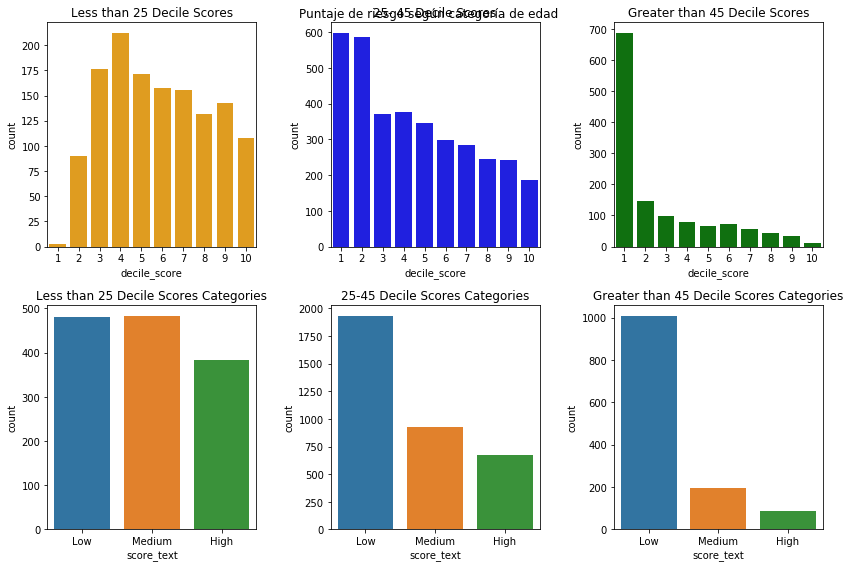

In [31]:
#@title Riesgo según categoría de edad.

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()

sns.countplot(x=less25_data['decile_score'], ax=ax[0], color='orange')
sns.countplot(x=from25to45_data['decile_score'], ax=ax[1], color='blue')
sns.countplot(x=greater45_data['decile_score'], ax=ax[2], color='green')

sns.countplot(x=less25_data['score_text'], ax=ax[3], order=['Low', 'Medium', 'High'])
sns.countplot(x=from25to45_data['score_text'], ax=ax[4], order=['Low', 'Medium', 'High'])
sns.countplot(x=greater45_data['score_text'], ax=ax[5], order=['Low', 'Medium', 'High'])

ax[0].set_title('Less than 25 Decile Scores')
ax[1].set_title('25- 45 Decile Scores')
ax[2].set_title('Greater than 45 Decile Scores')
ax[3].set_title('Less than 25 Decile Scores Categories')
ax[4].set_title('25-45 Decile Scores Categories')
ax[5].set_title('Greater than 45 Decile Scores Categories')


plt.suptitle('Puntaje de riesgo según categoría de edad')

fig.tight_layout()


plt.show()

In [32]:
pd.crosstab(values=clean_df['score_text'], columns=clean_df['score_text'], index=clean_df['age_cat'], aggfunc=lambda x: len(x), normalize='index') * 100

score_text,High,Low,Medium
age_cat,,,
25 - 45,19.054360,54.699887,26.245753
Greater than 45,6.805878,77.958237,15.235886
Less than 25,28.433556,35.708983,35.857461


## Pre - procesamiento

In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 835.1+ KB


In [34]:
object_columns = clean_df.select_dtypes(include='object').columns
for objcol in object_columns:
  print(f'Columna {objcol}: {clean_df[objcol].unique()}')

Columna c_charge_degree: ['F' 'M']
Columna race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
Columna age_cat: ['Greater than 45' '25 - 45' 'Less than 25']
Columna score_text: ['Low' 'Medium' 'High']
Columna sex: ['Male' 'Female']
Columna c_jail_in: ['2013-08-13 06:03:42' '2013-01-26 03:45:27' '2013-04-13 04:58:34' ...
 '2014-01-13 05:48:01' '2014-03-08 08:06:02' '2014-06-28 12:16:41']
Columna c_jail_out: ['2013-08-14 05:41:20' '2013-02-05 05:36:53' '2013-04-14 07:02:04' ...
 '2014-01-14 07:49:46' '2014-03-09 12:18:04' '2014-06-30 11:19:23']


In [35]:
object_columns = [x for x in clean_df.select_dtypes(include='object').columns if x != 'c_jail_in' and x!= 'c_jail_out']
for objcol in object_columns:
  clean_df[objcol] = clean_df[objcol].astype('category')

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      6172 non-null   int64   
 1   c_charge_degree          6172 non-null   category
 2   race                     6172 non-null   category
 3   age_cat                  6172 non-null   category
 4   score_text               6172 non-null   category
 5   sex                      6172 non-null   category
 6   priors_count             6172 non-null   int64   
 7   days_b_screening_arrest  6172 non-null   float64 
 8   decile_score             6172 non-null   int64   
 9   is_recid                 6172 non-null   int64   
 10  two_year_recid           6172 non-null   int64   
 11  c_jail_in                6172 non-null   object  
 12  c_jail_out               6172 non-null   object  
dtypes: category(5), float64(1), int64(5), object(2)
memory usage: 6

In [37]:
clean_df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


In [38]:
pd.get_dummies(clean_df['race']).head()

,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,1,0,0,0,0,0
5,0,0,0,0,0,1
6,0,0,1,0,0,0


In [39]:
#@title Dummies race

dummies = pd.get_dummies(clean_df['race'])
clean_df = pd.concat([clean_df, dummies], axis=1)
clean_df.drop(columns=['race', 'Caucasian'], inplace=True)

In [40]:
clean_df.head()

,age,c_charge_degree,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other
0,69,F,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1
1,34,F,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0
2,24,F,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0
5,44,M,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1
6,41,F,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0


In [41]:
post_df = clean_df.copy()

In [42]:
#@title Dummies age_cat

dummies = pd.get_dummies(post_df['age_cat'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['age_cat', '25 - 45'], inplace=True)

In [43]:
#@title Dummies sex

dummies = pd.get_dummies(post_df['sex'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['sex', 'Male'], inplace=True)

In [44]:
#@title Dummies Charge Degree

dummies = pd.get_dummies(post_df['c_charge_degree'])
post_df = pd.concat([post_df, dummies], axis=1)
post_df.drop(columns=['c_charge_degree', 'M'], inplace=True)

In [45]:
post_df.head()

,age,score_text,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,African-American,Asian,Hispanic,Native American,Other,Greater than 45,Less than 25,Female,F
0,69,Low,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0,0,0,0,1,1,0,0,1
1,34,Low,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,1,0,0,0,0,0,0,0,1
2,24,Low,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1,0,0,0,0,0,1,0,1
5,44,Low,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56,0,0,0,0,1,0,0,0,0
6,41,Medium,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,0,0,0,0,0,0,0,0,1
